In [66]:
import numpy as np
import pandas as pd
from datetime import datetime, date 


#可视化
import matplotlib.pyplot as plt
import seaborn as sns

#取消警告
import warnings 
warnings.filterwarnings('ignore') 

In [67]:
df = pd.read_csv('dataset\Aquifer\Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [68]:
#在第一个Rainfall数据出现以前，仅有Depth_to_Groundwater_P24和Depth_to_Groundwater_P25以及少量的Temperature_Petrignano的数据
df1 = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
df1.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [69]:
#将 "Date" 列设置为索引，并将其转换为 DateTime 类型
df1['Date'] = pd.to_datetime(df1['Date'], format = '%d/%m/%Y')
df1.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [70]:
#去掉没有用的
df1=df1.drop(['Temperature_Petrignano'], axis=1)

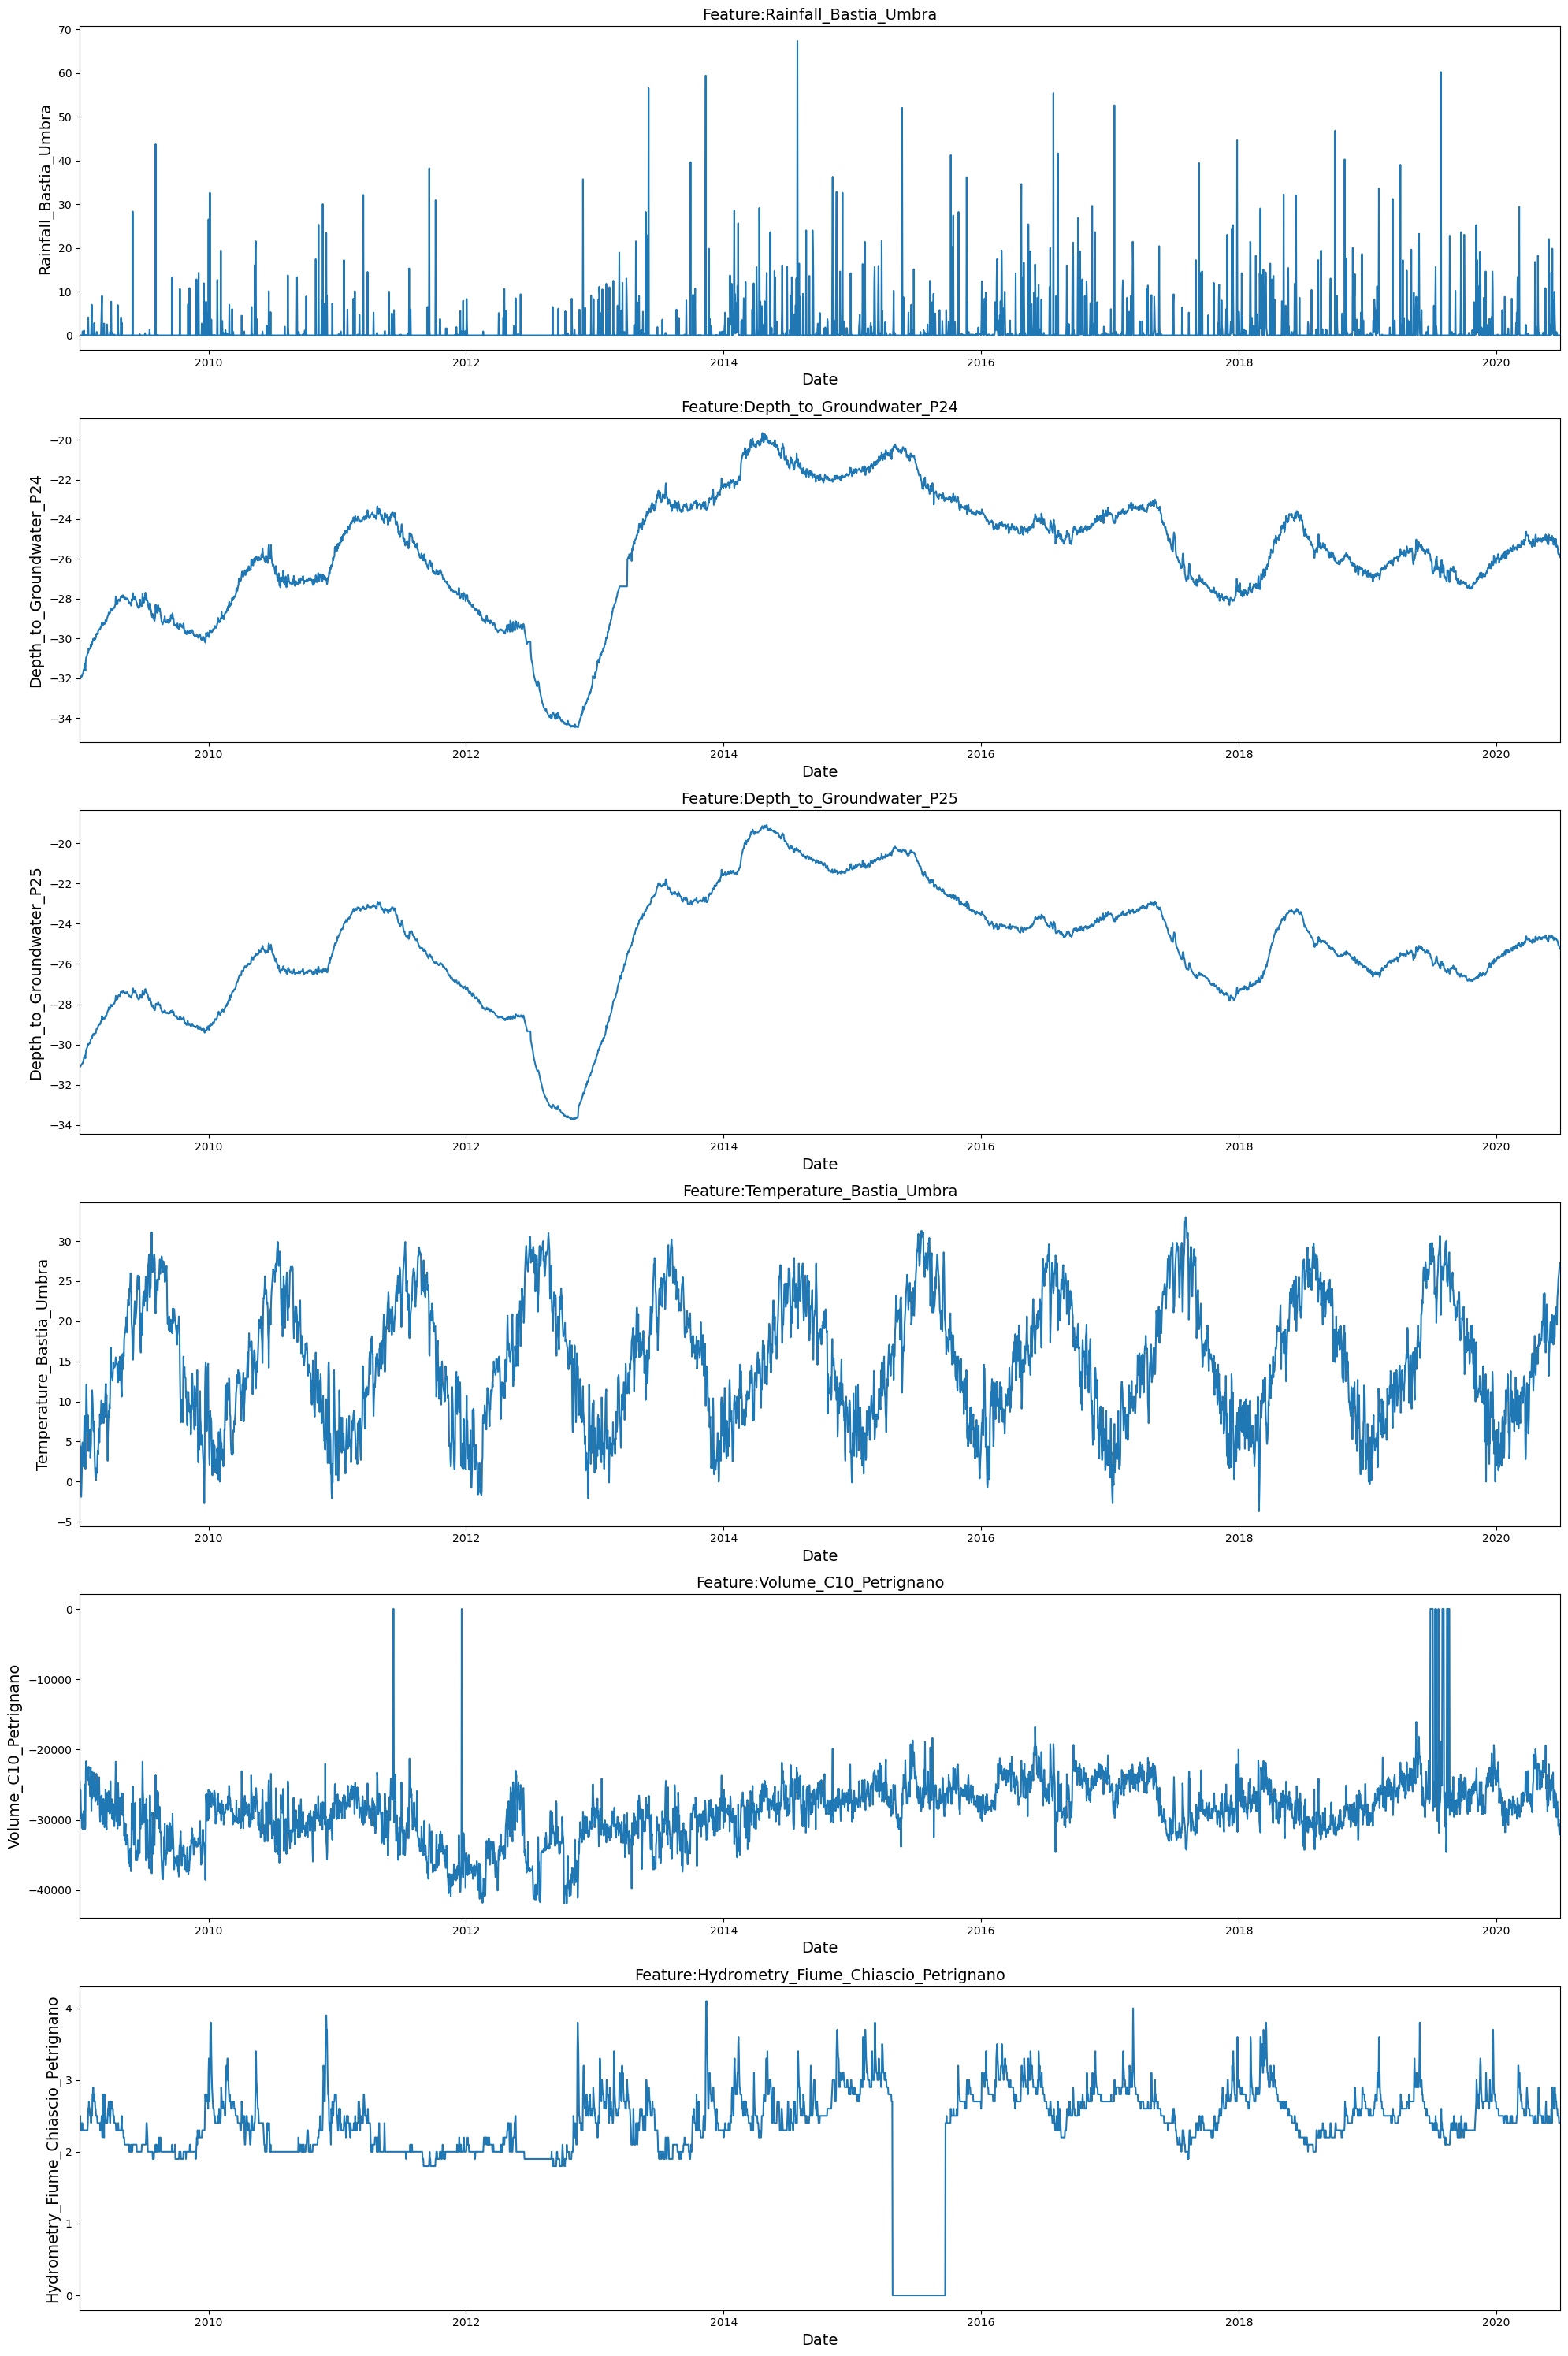

In [71]:
#出去日期有六列数据
f,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30))

#以列取修改后的数据，删去日期列作为x，其他数据作为y,并且对其中缺失的数据用前一个数据进行填充
for i,column in enumerate(df1.drop('Date',axis=1).columns):
    sns.lineplot(x=df1['Date'],y=df1[column].fillna(method='ffill'),ax=ax[i])
    ax[i].set_title('Feature:{}'.format(column),fontsize=14)
    ax[i].set_ylabel(ylabel=column,fontsize=14)
    ax[i].set_xlabel(xlabel='Date',fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

plt.tight_layout()
    
    

    

In [72]:
#统计缺失值的数量
df1.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

(14245.0, 18443.0)

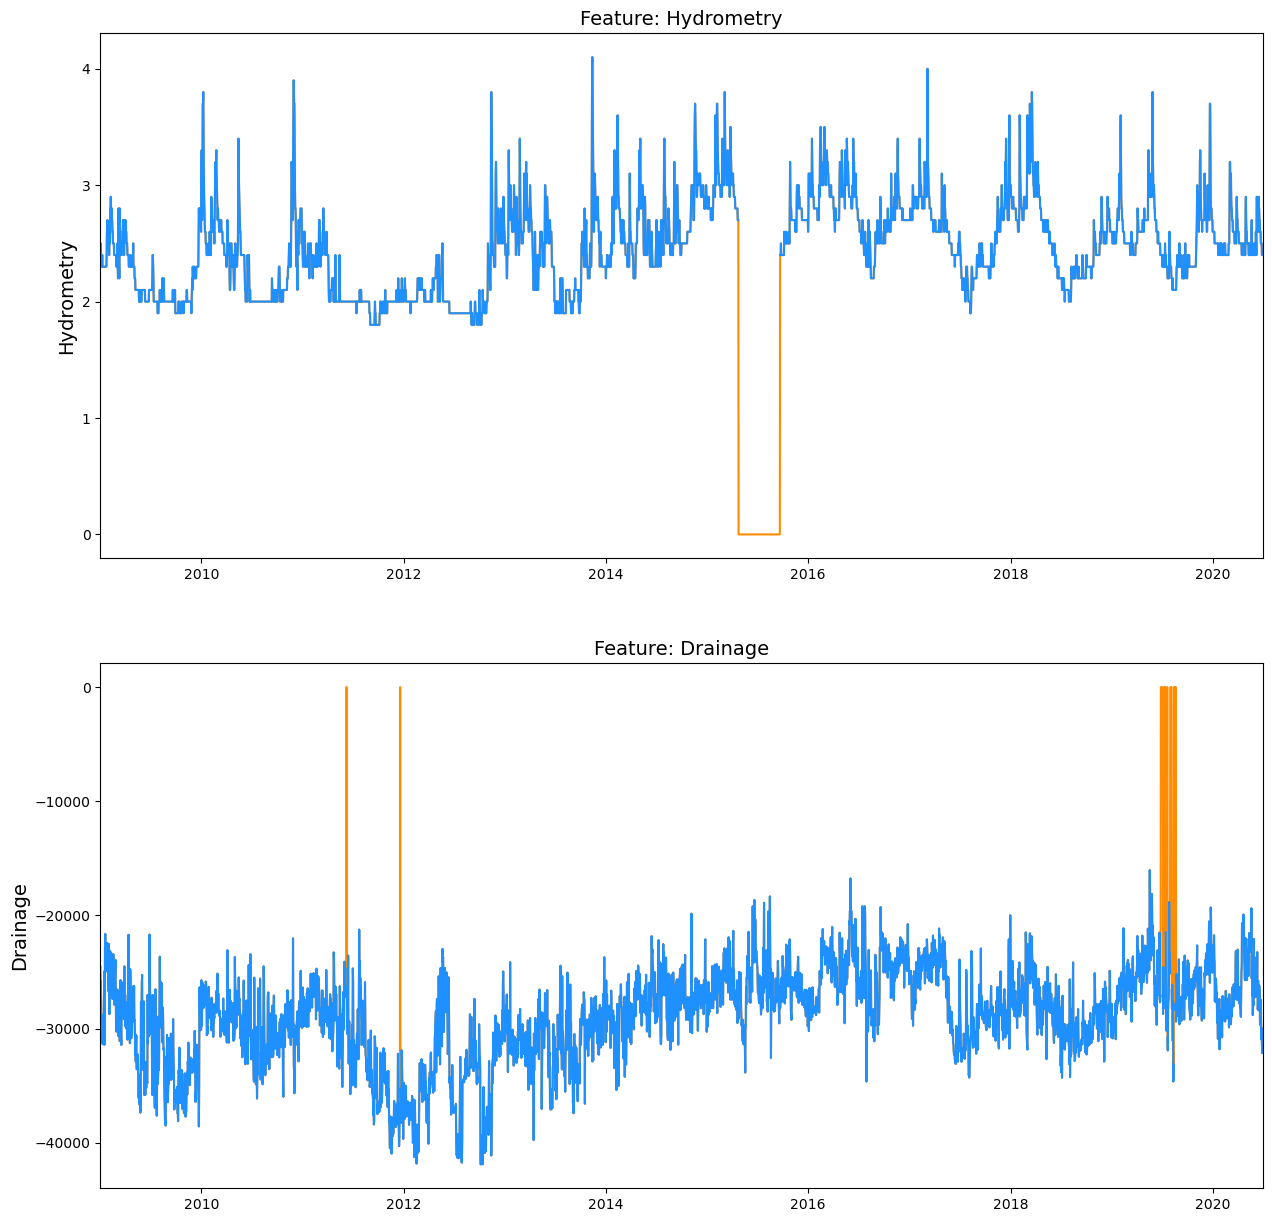

In [73]:
#发现volume有一个缺失值，实际上volume和hydrometry有许多0值都是需要处理的
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df1['Hydrometry_Fiume_Chiascio_Petrignano'].copy()
df1['Hydrometry_Fiume_Chiascio_Petrignano'] = df1['Hydrometry_Fiume_Chiascio_Petrignano'].replace(0, np.nan)

ax[0].plot(df1['Date'], old_hydrometry,color='darkorange', label='original')
ax[0].plot(df1['Date'], df1['Hydrometry_Fiume_Chiascio_Petrignano'].fillna(np.inf),color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df1['Volume_C10_Petrignano'].copy()
df1['Volume_C10_Petrignano'] = df1['Volume_C10_Petrignano'].replace(0, np.nan)

ax[1].plot(df1['Date'], old_drainage,color='darkorange', label='original')
ax[1].plot(df1['Date'], df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

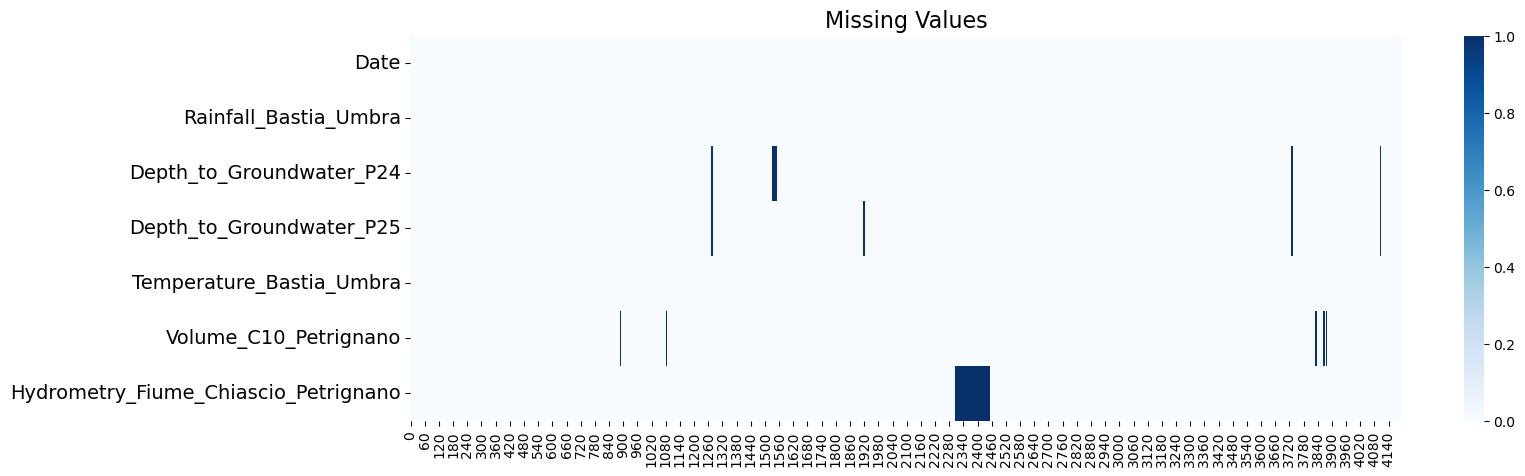

In [74]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df1.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

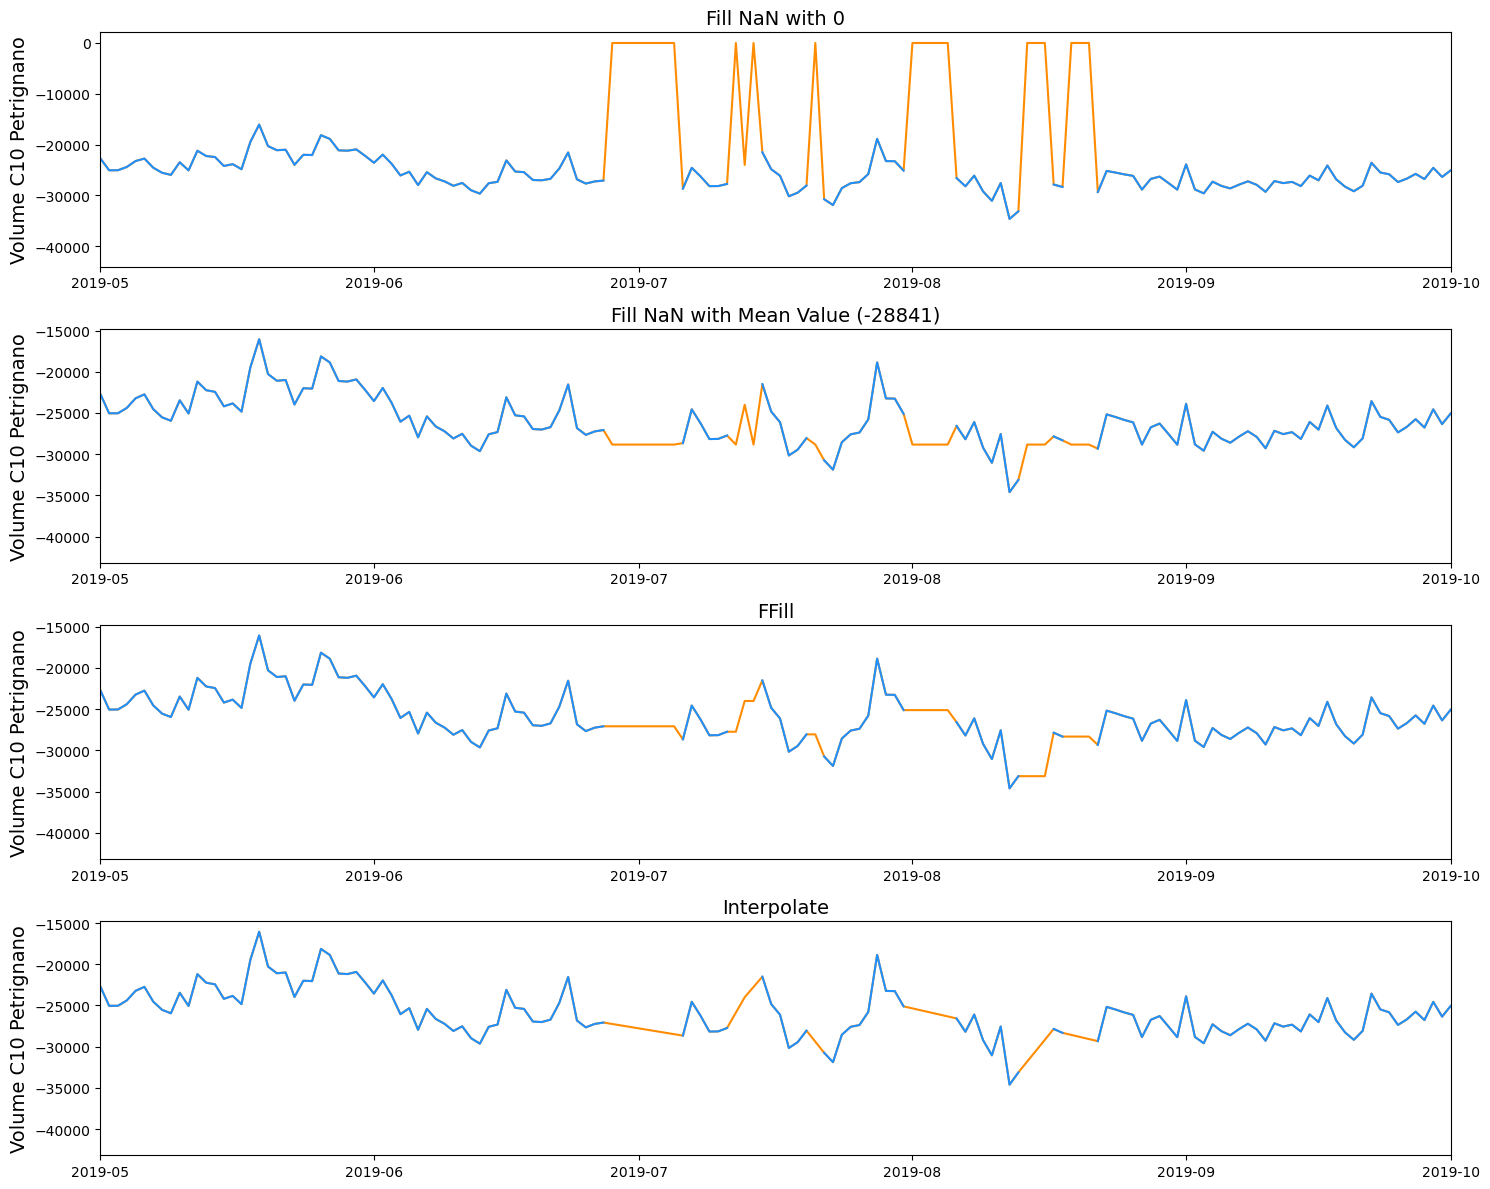

In [75]:
#使用四种不同的方式处理缺失值
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
#插入0
ax[0].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(0),color='darkorange', label = 'modified')
ax[0].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#插入均值
mean_drainage = df1['Volume_C10_Petrignano'].mean()
ax[1].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(mean_drainage),color='darkorange', label = 'modified')
ax[1].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#向前填充
ax[2].plot(df1['Date'],df1['Volume_C10_Petrignano'].ffill(),color='darkorange', label = 'modified')
ax[2].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#线性插值
ax[3].plot(df1['Date'],df1['Volume_C10_Petrignano'].interpolate(),color='darkorange', label = 'modified')
ax[3].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [76]:
df1['Volume_C10_Petrignano'] = df1['Volume_C10_Petrignano'].interpolate()
df1['Hydrometry_Fiume_Chiascio_Petrignano'] = df1['Hydrometry_Fiume_Chiascio_Petrignano'].interpolate()
df1['Depth_to_Groundwater_P24'] = df1['Depth_to_Groundwater_P24'].interpolate()
df1['Depth_to_Groundwater_P25'] = df1['Depth_to_Groundwater_P25'].interpolate()

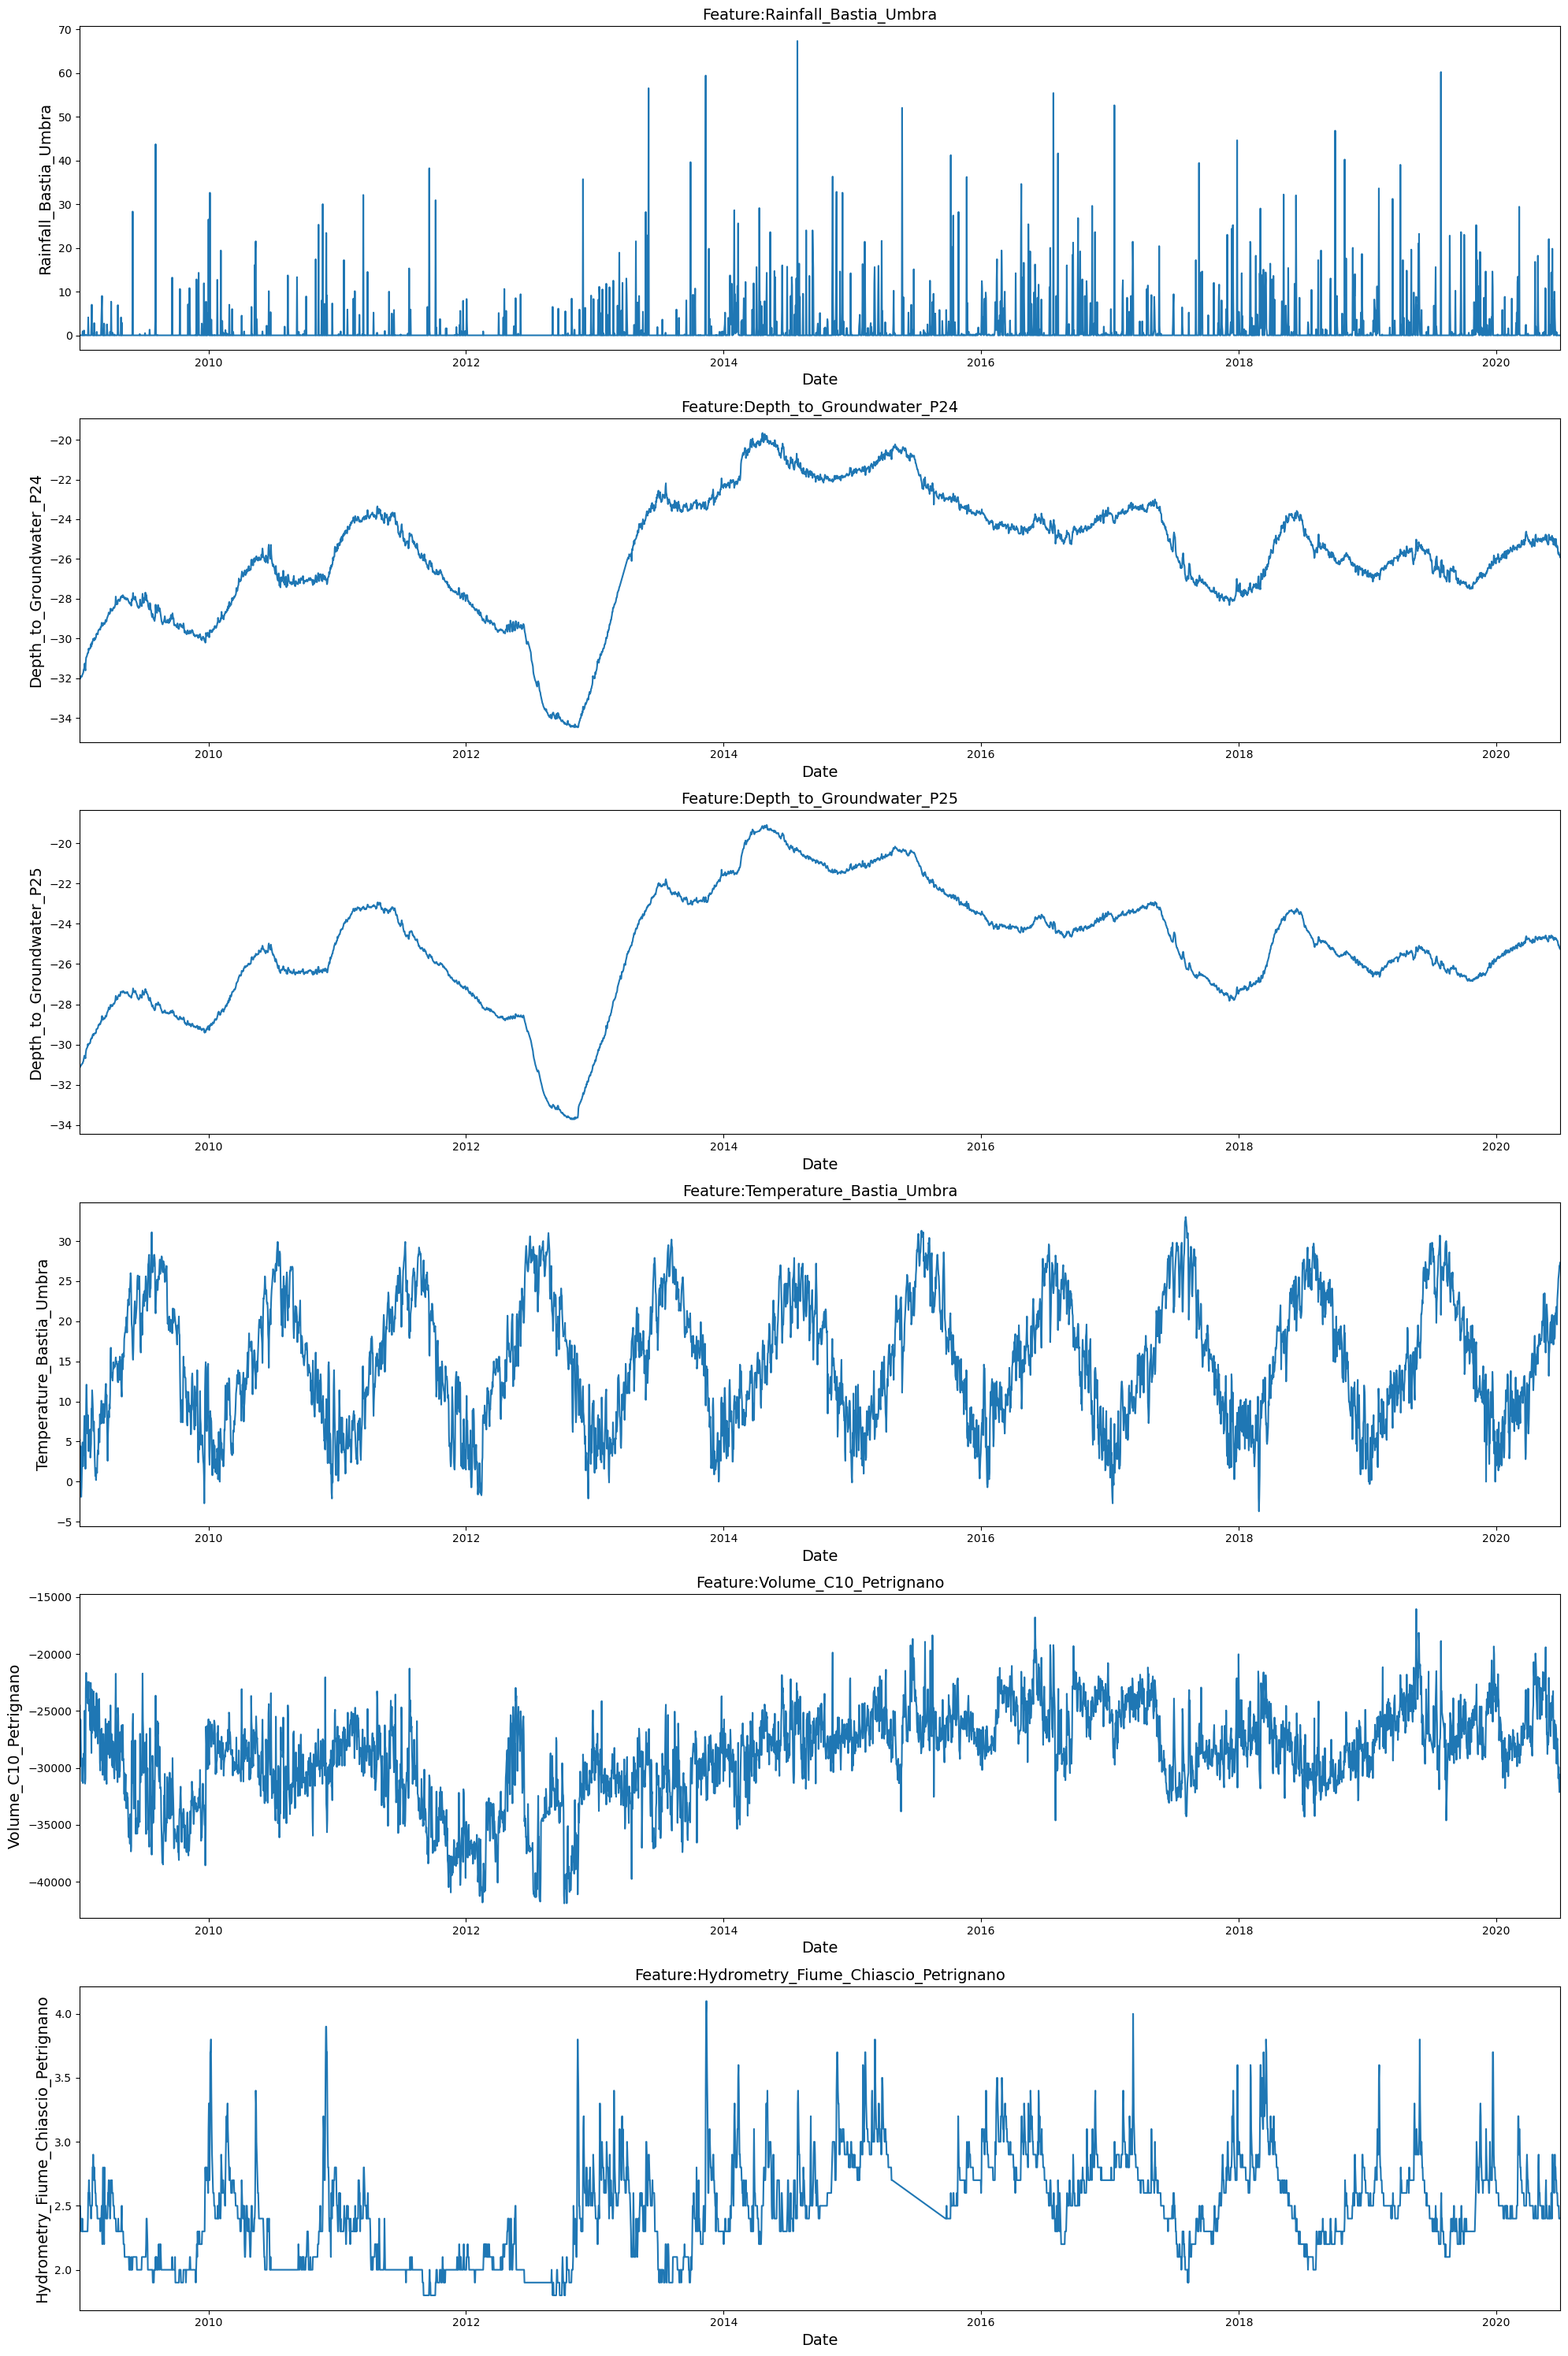

In [77]:
f,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30))

#以列取修改后的数据，删去日期列作为x，其他数据作为y
for i,column in enumerate(df1.drop('Date',axis=1).columns):
    sns.lineplot(x=df1['Date'],y=df1[column],ax=ax[i])
    ax[i].set_title('Feature:{}'.format(column),fontsize=14)
    ax[i].set_ylabel(ylabel=column,fontsize=14)
    ax[i].set_xlabel(xlabel='Date',fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

plt.tight_layout()

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

rolling_window = 42

target_columns = ['Depth_to_Groundwater_P24','Depth_to_Groundwater_P25']
feature_columns = ['Rainfall_Bastia_Umbra','Temperature_Bastia_Umbra','Volume_C10_Petrignano','Hydrometry_Fiume_Chiascio_Petrignano']
X = df1[feature_columns].values
y = df1[target_columns].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [14]:
X_sequences , y_sequences = [],[]
for i in range(len(X)-rolling_window):
    X_sequences.append(X[i:i+rolling_window])
    y_sequences.append(y[i+rolling_window])
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)
X_train,X_test,y_train,y_test = train_test_split(X_sequences,y_sequences,test_size=0.2,random_state=1)
print(X_train.shape)

(3325, 42, 4)


In [115]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(2))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))

model.summary()

Epoch 1/50
52/52 [==============================] - 8s 84ms/step - loss: 0.5623 - val_loss: 0.5438
Epoch 2/50
52/52 [==============================] - 3s 65ms/step - loss: 0.4652 - val_loss: 0.4392
Epoch 3/50
52/52 [==============================] - 3s 60ms/step - loss: 0.4158 - val_loss: 0.4310
Epoch 4/50
52/52 [==============================] - 3s 60ms/step - loss: 0.3349 - val_loss: 0.3174
Epoch 5/50
52/52 [==============================] - 3s 59ms/step - loss: 0.2872 - val_loss: 0.3131
Epoch 6/50
52/52 [==============================] - 3s 58ms/step - loss: 0.2693 - val_loss: 0.2239
Epoch 7/50
52/52 [==============================] - 3s 59ms/step - loss: 0.2013 - val_loss: 0.1874
Epoch 8/50
52/52 [==============================] - 3s 60ms/step - loss: 0.1607 - val_loss: 0.1251
Epoch 9/50
52/52 [==============================] - 3s 61ms/step - loss: 0.1246 - val_loss: 0.1279
Epoch 10/50
52/52 [==============================] - 3s 59ms/step - loss: 0.1003 - val_loss: 0.0919
Epoch 11/

In [116]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

26/26 [==============================] - 1s 13ms/step - loss: 0.0031
Test Loss: 0.003079281421378255


In [117]:
lstm_predictions = model.predict(X_test)

26/26 [==============================] - 1s 13ms/step


from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
rolling_window = 42
X_sequences , y_sequences = [],[]
for i in range(len(X)-rolling_window):
    X_sequences.append(X[i:i+rolling_window])
    y_sequences.append(y[i+rolling_window])
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)
X_train,X_test,y_train,y_test = train_test_split(X_sequences,y_sequences,test_size=0.2,random_state=1)
print(y_train.shape)
models = [pm.auto_arima(y_train[:,i], start_p=1, start_q=1,
                        test='adf',       # use adftest to find optimal 'd'
                        max_p=3, max_q=3, # maximum p and q
                        m=1,              # frequency of series
                        d=None,           # let model determine 'd'
                        seasonal=False,   # No Seasonality
                        start_P=0, 
                        D=0, 
                        trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)
                        for i in range(y_train.shape[1])]
for i,model in enumerate(models):
    print(model.summary())
    model.plot_diagnostics(figsize=(16,8))
    plt.show()

In [119]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import pmdarima as pm
rolling_window = 42
X_sequences , y_sequences = [],[]
for i in range(len(X)-rolling_window):
    X_sequences.append(X[i:i+rolling_window])
    y_sequences.append(y[i+rolling_window])
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)
X_train,X_test,y_train,y_test = train_test_split(X_sequences,y_sequences,test_size=0.2,random_state=1)
# Fit model
models = [ARIMA(y_train[:,i], order=(1,1,1)) for i in range(y_train.shape[1])]
for i,model in enumerate(models):
    model_fit = model.fit()

    # Prediction with ARIMA
    y_pred = model_fit.forecast(steps=len(y_test))

    # Calcuate metrics
    score_mae = mean_absolute_error(y_test[:,i], y_pred)
    score_rmse = math.sqrt(mean_squared_error(y_test[:,i], y_pred))

    print( 'RMSE: {}'.format(score_rmse))

RMSE: 0.971228325665341
RMSE: 0.9724331869030428


In [120]:
predictions = [model.fit().forecast(steps=len(y_test)) for model in models]

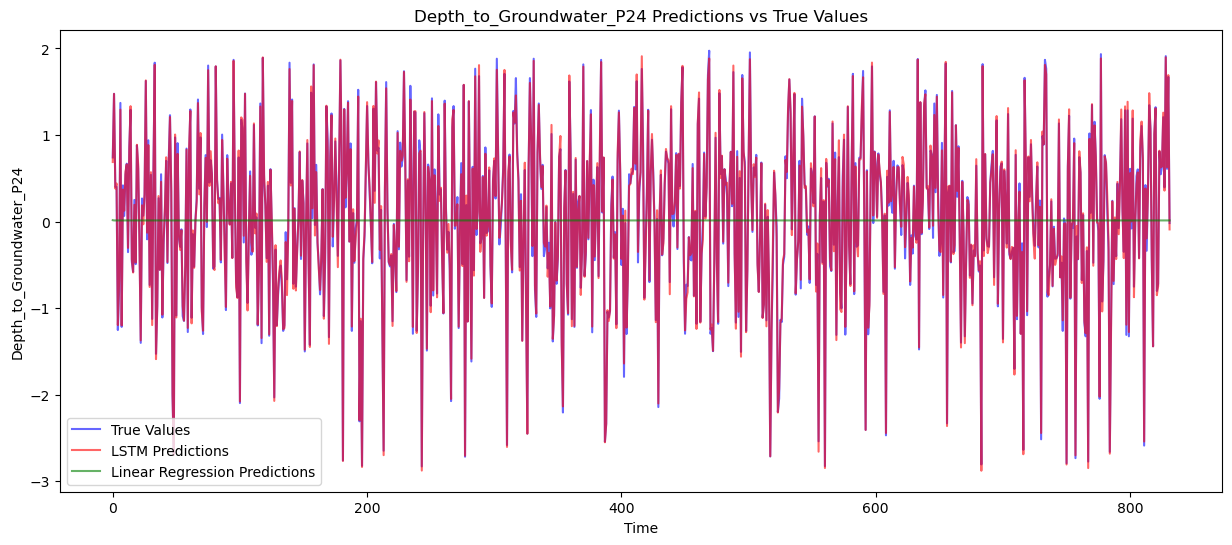

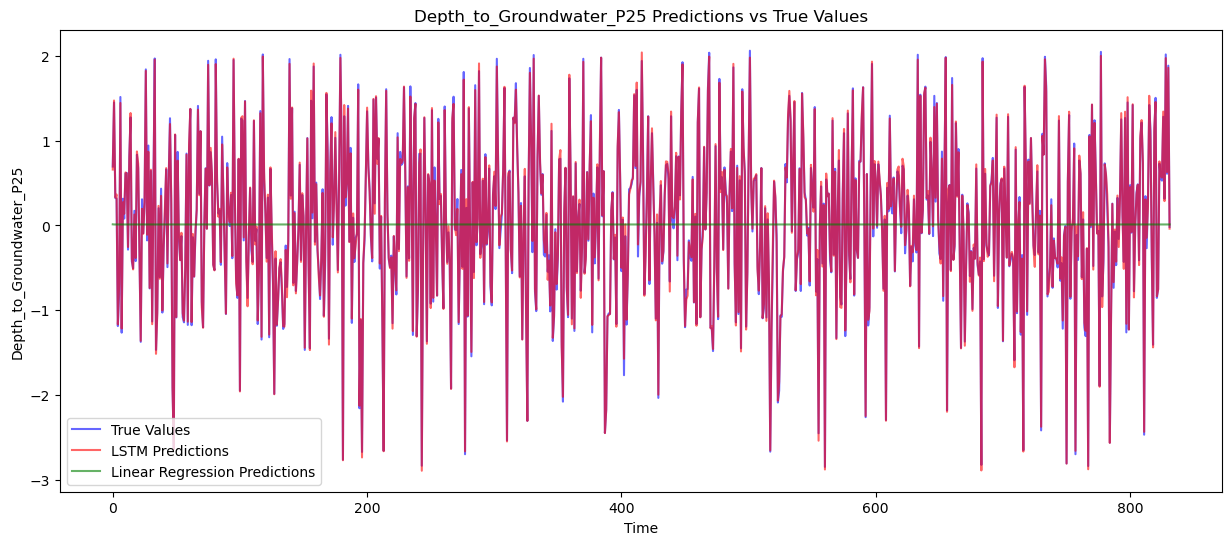

In [121]:
import matplotlib.pyplot as plt

# 为每一列数据生成图表
for i, target_column in enumerate(target_columns):
    # 获取真实值、LSTM模型预测值和线性回归模型预测值
    true_values = y_test[:, i]
    lstm_predictions_column = lstm_predictions[:, i]  # 获取第 i 列的LSTM预测值
    linear_predictions_column = predictions[i]  # 获取第 i 列的线性回归预测值

    # 创建时间序列
    time_series = range(len(true_values))

    # 创建一个新的图表
    plt.figure(figsize=(15, 6))

    # 绘制真实值
    plt.plot(time_series, true_values, label='True Values', color='blue', alpha=0.6)

    # 绘制LSTM模型预测值
    plt.plot(time_series, lstm_predictions_column, label='LSTM Predictions', color='red', alpha=0.6)

    # 绘制线性回归模型预测值
    plt.plot(time_series, linear_predictions_column, label='Linear Regression Predictions', color='green', alpha=0.6)

    # 设置标题和标签
    plt.title(f'{target_column} Predictions vs True Values')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    # 添加图例
    plt.legend()

    # 显示图表
    plt.show()


In [78]:
#data = data[data.Depth_to_Groundwater_Podere_Casetta.notna()].reset_index(drop=True)  #删去09年前的数据
output = ['Depth_to_Groundwater_P24']
df1['Date'] = pd.to_datetime(df1.Date, format='%d/%m/%Y')
df1.set_index('Date', inplace=True)
data_output1 = df1.loc['2009-01-01':'2020-06-30', 'Depth_to_Groundwater_P24']
data_output1 = data_output1.interpolate()
data_output2 = df1.loc['2009-01-01':'2020-06-30', 'Depth_to_Groundwater_P25']
data_output2 = data_output2.interpolate()
print(data_output1)
data_output1.to_csv('data_output1.csv')
print(data_output2)
data_output2.to_csv('data_output2.csv')

Date
2009-01-01   -31.96
2009-01-02   -32.03
2009-01-03   -31.97
2009-01-04   -31.91
2009-01-05   -31.94
              ...  
2020-06-26   -25.68
2020-06-27   -25.80
2020-06-28   -25.80
2020-06-29   -25.78
2020-06-30   -25.91
Name: Depth_to_Groundwater_P24, Length: 4199, dtype: float64
Date
2009-01-01   -31.14
2009-01-02   -31.11
2009-01-03   -31.07
2009-01-04   -31.05
2009-01-05   -31.01
              ...  
2020-06-26   -25.07
2020-06-27   -25.11
2020-06-28   -25.19
2020-06-29   -25.18
2020-06-30   -25.25
Name: Depth_to_Groundwater_P25, Length: 4199, dtype: float64


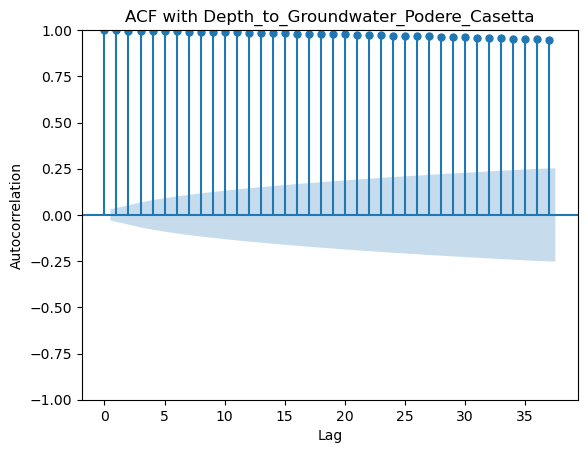

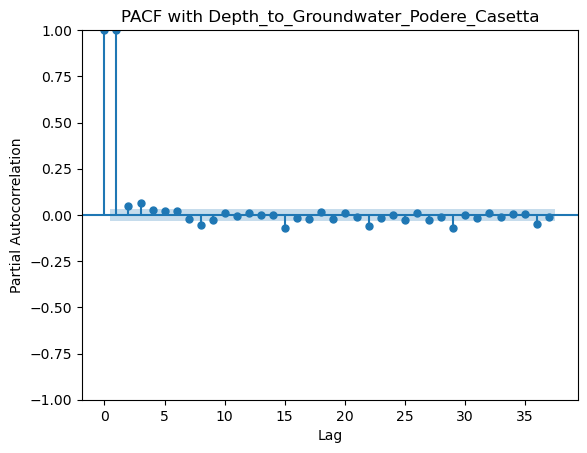

In [64]:
#ARIMA模型---Depth_to_Groundwater1
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
train_data = data_output1.loc['2009-01-01':'2017-01-01']
test_data = data_output1.loc['2017-01-02':'2020-06-30']
plot_acf(data_output1, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF with Depth_to_Groundwater_Podere_Casetta')

plt.show()
plot_pacf(data_output1, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF with Depth_to_Groundwater_Podere_Casetta')
plt.show()

-2.789345795963294


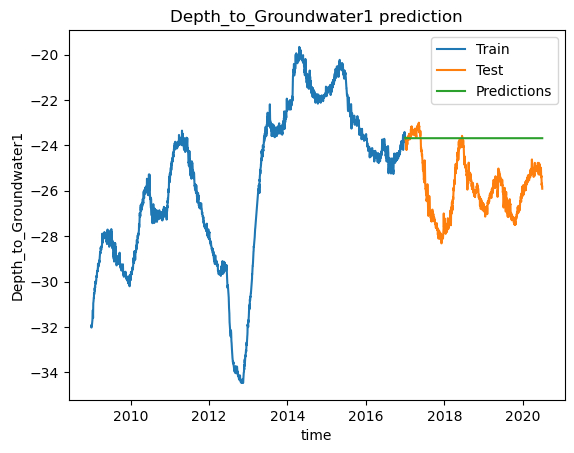

In [65]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(0, 1, 18))
model_fit = model.fit()
start_date = test_data.index[0]
end_date = test_data.index[-1]
predictions = model_fit.predict(start=start_date, end=end_date)
print(r2_score(test_data, predictions))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(predictions, label='Predictions')
plt.xlabel('time')
plt.ylabel('Depth_to_Groundwater1')
plt.title('Depth_to_Groundwater1 prediction')
plt.legend()
plt.show()